# Bank customer churn
### Logistic Regression vs Random Forest classification
#### dataset from: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

1. CustomerId — contains random values and has no effect on customer leaving the bank.
1. Surname — the surname of a customer has no impact on their decision to leave the bank.
1. CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
1. Geography — a customer’s location can affect their decision to leave the bank.
1. Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
1. Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
1. Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
1. Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
1. NumOfProducts — refers to the number of products that a customer has purchased through the bank.
1. HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
1. IsActiveMember — active customers are less likely to leave the bank.
1. EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
1. Exited — whether or not the customer left the bank.
1. Complain — customer has complaint or not.
1. Satisfaction Score — Score provided by the customer for their complaint resolution.
1. Card Type — type of card hold by the customer.
1. Points Earned—the points earned by the customer for using credit card.

In [1]:
!pip install pyforest
import pyforest
sns.set()

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -n /content/bank-customer-churn.zip

Archive:  /content/bank-customer-churn.zip


In [5]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")
df.head(3)

<IPython.core.display.Javascript object>

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.info()  # No nulls to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [8]:
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

### Class imbalance

In [9]:
df['Exited'].value_counts() # moderate class imbalance 20.38% of the data entries are customers who exited

0    7962
1    2038
Name: Exited, dtype: int64

In [10]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1])

In [11]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=[False,True,False])
exited_column = df_encoded.pop('Exited')
df_encoded['Exited'] = exited_column

<IPython.core.display.Javascript object>

## Correlation heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

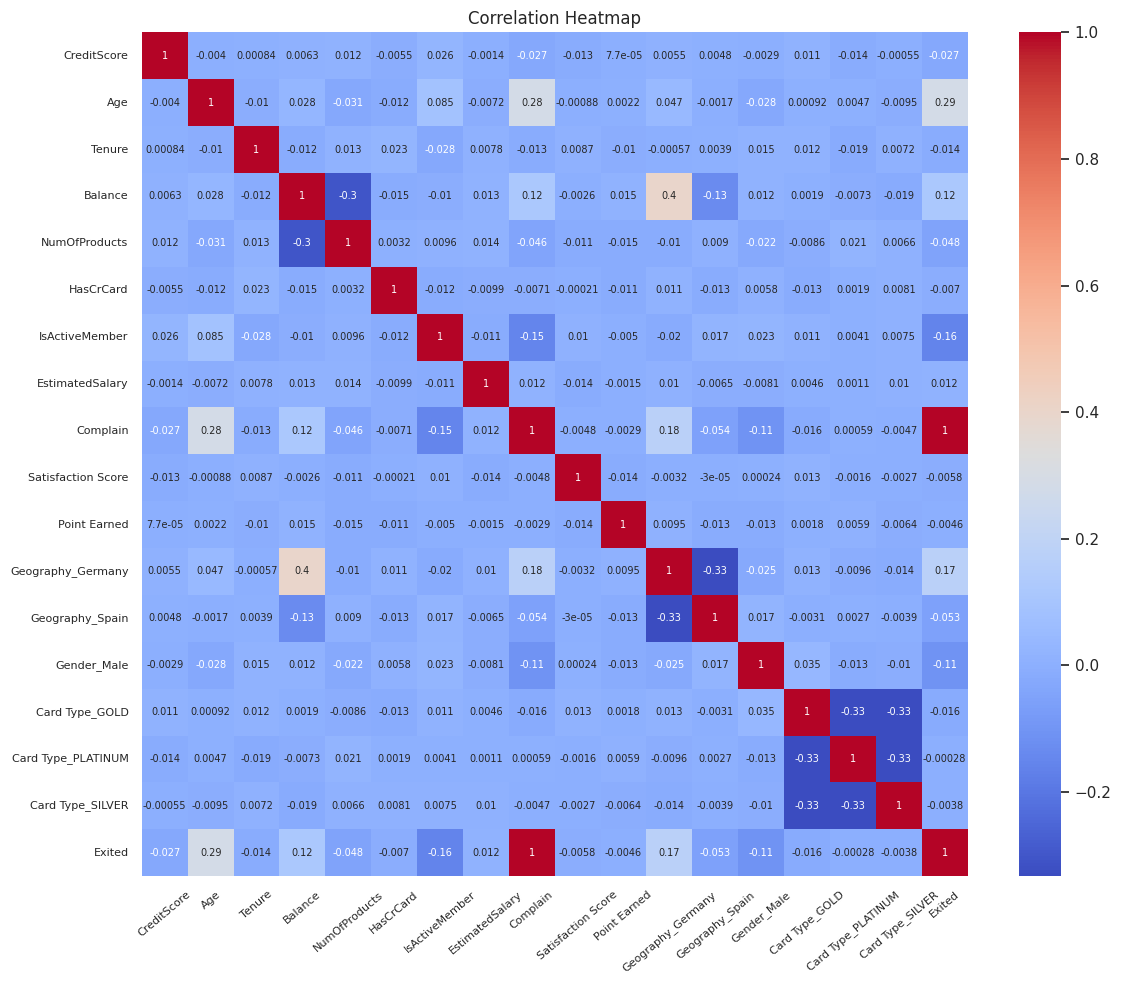

In [12]:
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap')
sns.heatmap(df_encoded.corr(), cmap='coolwarm',annot=True,annot_kws={"size":7})
plt.xticks(fontsize=8,rotation=40)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [13]:
df_encoded['Exited'].corr(df_encoded['Complain']) # complain's correlation with Exited high and could lead to overfitting, will be kept because of performance impact
# df_encoded = df_encoded.drop('Complain',axis=1)

0.9956925015718864

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

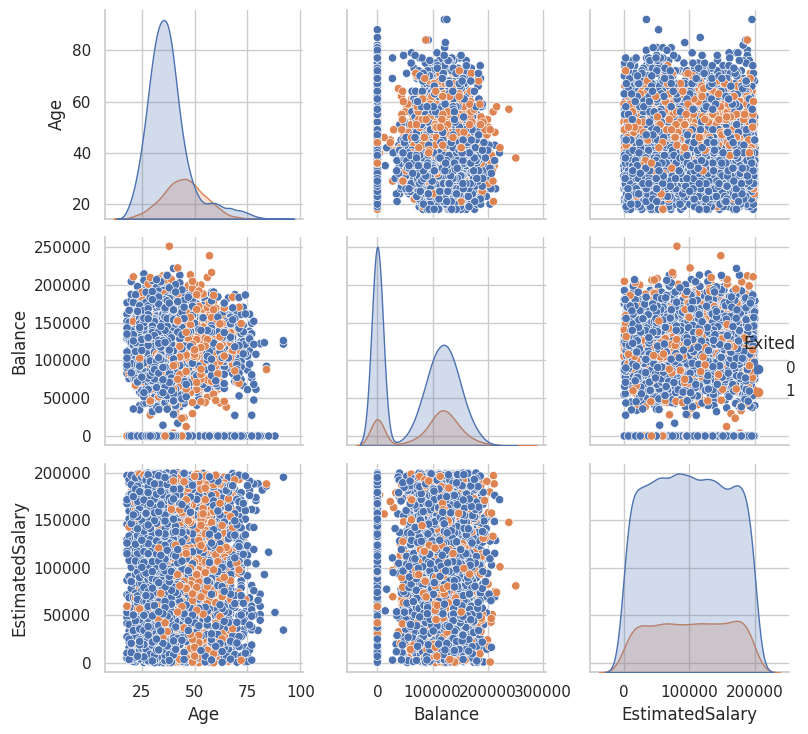

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df_encoded,vars= ['Age','Balance','EstimatedSalary'], hue='Exited')
plt.tight_layout()
plt.show()

## Logistic regression model

In [15]:
rand_state = 20
test_size = 0.2
y = df_encoded['Exited'].copy()
X = df_encoded.drop('Exited',axis=1).copy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

<IPython.core.display.Javascript object>

In [16]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4661,780,43,0,0.00,1,0,1,15705.27,0,1,245,0,0,0,0,0,0
7168,507,33,7,0.00,2,1,1,85411.01,0,2,675,0,0,1,0,1,0
1031,631,22,3,0.00,2,0,0,30781.77,0,1,982,0,0,0,0,1,0
6746,640,39,3,0.00,1,1,1,105997.25,0,1,540,0,1,1,0,0,1
9228,699,39,2,109724.38,1,1,1,180022.39,0,2,412,0,0,1,1,0,0


In [17]:
y_train.head()

4661    0
7168    0
1031    0
6746    0
9228    0
Name: Exited, dtype: int64

In [18]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_hat       = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]
np.round(logistic.predict_proba(X_test),3)
print(len(y_hat_probs))
np.set_printoptions(threshold=5)
y_hat_probs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2000


<IPython.core.display.Javascript object>

array([0.11068108, 0.09949761, 0.17437026, ..., 0.20860869, 0.31583155,
       0.13932773])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

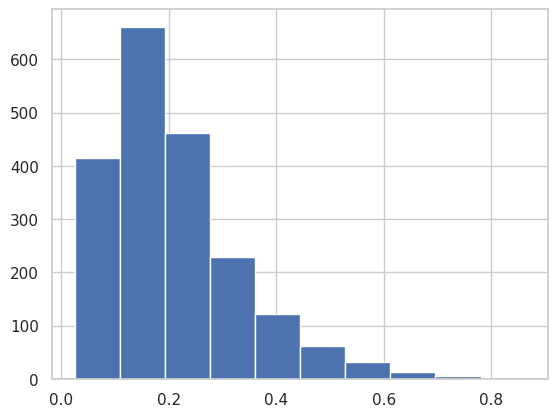

In [19]:
plt.hist(y_hat_probs) # default classification threshold is 0.5
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5):
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train) # fitting
    # probs = logistic.predict_proba(X_test)[:,1] # predicting
    # y_hat = np.where(probs>=threshold,1,0)
    y_hat = logistic.predict(X_test)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labeled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])

    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labeled

In [21]:
my_logistic_report(X_train, y_train, X_test,y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-----------------------------------------
Accuracy  = 0.8
Precision = 0.33
Recall    = 0.06
f1_score  = 0.1
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,1579,44
Actual : positive,355,22


## Resampling
### Since data was moderately inbalanced 20/80 we perform a resampling. Oversampling minority class (churn)

In [22]:
y = df_encoded['Exited'].copy()
X = df_encoded.drop('Exited',axis=1).copy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

<IPython.core.display.Javascript object>

In [23]:
data = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1) # Concatenate the features and target variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-23-731d0eda2dfa>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1) # Concatenate the features and target variable


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

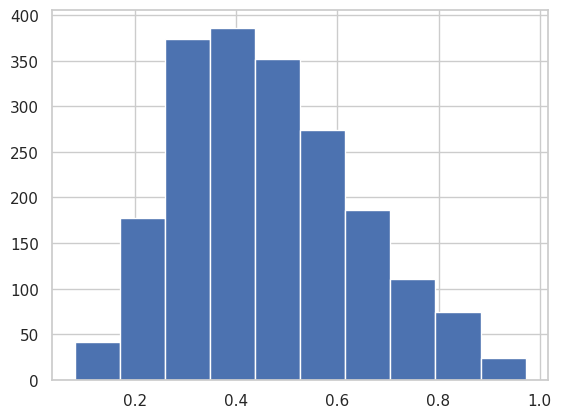

In [24]:
from sklearn.utils import resample

majority_class = data[data[:, -1] == 0]
minority_class = data[data[:, -1] == 1] # Separate majority and minority classes using concatenated column (y)

minority_oversampled = resample(minority_class,
                                replace=True,  # sample with replacement
                                n_samples=len(majority_class),  # match number in majority class
                                random_state=rand_state)  # rand_state for reproducibility

# Combine the oversampled minority class with the majority class
oversampled_data = np.concatenate((majority_class, minority_oversampled), axis=0)

# Separate the features and target variable after oversampling
X_oversampled = oversampled_data[:, :-1]
y_oversampled = oversampled_data[:, -1]

X_oversampled_df = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled_df = pd.DataFrame(y_oversampled, columns=['Exited'])

# Convert y_train_oversampled to a 1D array using ravel()
y_oversamples_df_ravel = y_oversampled_df.values.ravel()

logistic = LogisticRegression()
logistic.fit(X_oversampled_df, y_oversamples_df_ravel) #training with oversampled data

y_hat       = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]
np.round(logistic.predict_proba(X_test),3)
print(len(y_hat_probs))

plt.hist(y_hat_probs)
plt.show()

In [25]:
my_logistic_report(X_oversampled_df,y_oversamples_df_ravel, X_test,y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-----------------------------------------
Accuracy  = 0.67
Precision = 0.31
Recall    = 0.63
f1_score  = 0.42
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,1093,530
Actual : positive,139,238


## Resampling improves f1 score from 0.1 to 0.43 but it's still not a reliable predictor.

# Random forest

In [26]:
from xgboost import XGBRFClassifier

X = df_encoded.drop('Exited', axis=1).copy()
y = df_encoded['Exited'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

xgb_model = XGBRFClassifier(n_estimators=100, random_state=rand_state)

xgb_model.fit(X_train, y_train)

y_hat = xgb_model.predict(X_test)
# While random forests do not inherently output probabilities, the function will still return the probability estimates based on the frequencies of the classes in the individual trees.
y_hat_proba = xgb_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

print("-----------------------------------------")
print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1))
print("-----------------------------------------")
cm = confusion_matrix(y_test, y_hat)
cm_labeled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
cm_labeled

<IPython.core.display.Javascript object>

-----------------------------------------
Accuracy  = 0.9985
Precision = 0.9921052631578947
Recall    = 1.0
f1_score  = 0.9960369881109644
-----------------------------------------


<IPython.core.display.Javascript object>

,Predict : negative,Predict :positive
Actual : negative,1620,3
Actual : positive,0,377


In [27]:
results_df = X_test.copy()
results_df['Exited'] = y_test
results_df['Exited_Predicted'] = y_hat
results_df['Exited_Probability'] = y_hat_proba[:, 1]  # Probability of possitive class
positive_preds = results_df[(results_df['Exited_Predicted']==1)].copy()
lowest_rows = positive_preds.sort_values('Exited_Probability').head(5) # lowest probability for predicted churn
lowest_rows

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Exited,Exited_Predicted,Exited_Probability
171,628,27,5,95826.49,2,1,0,155996.96,1,2,818,1,0,1,0,0,1,0,1,0.919119
1827,425,22,7,169649.73,2,0,1,136365.00,1,2,619,0,1,0,1,0,0,1,1,0.921712
4547,850,37,9,122506.38,1,0,1,199693.84,1,2,229,1,0,1,0,1,0,1,1,0.926474
2752,698,31,8,185078.26,1,0,0,115337.74,1,5,921,0,1,0,1,0,0,1,1,0.928137
3658,699,43,3,80764.03,1,1,0,199378.58,1,3,490,0,0,0,0,1,0,1,1,0.930754


In [28]:
feature_names = df_encoded.drop('Exited', axis=1).columns.tolist()
importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame(list(zip(feature_names, importance)), columns=['Feature', 'Importance'])
print('Importance of features towards a positive class classification:')
print('---------------------------------------------------------------')
print(feature_importance_df)
print('---------------------------------------------------------------')

<IPython.core.display.Javascript object>

Importance of features towards a positive class classification:
---------------------------------------------------------------
               Feature  Importance
0          CreditScore    0.000083
1                  Age    0.010504
2               Tenure    0.000142
3              Balance    0.000235
4        NumOfProducts    0.016693
5            HasCrCard    0.000076
6       IsActiveMember    0.017671
7      EstimatedSalary    0.000067
8             Complain    0.949064
9   Satisfaction Score    0.000248
10        Point Earned    0.000144
11   Geography_Germany    0.004789
12     Geography_Spain    0.000036
13         Gender_Male    0.000000
14      Card Type_GOLD    0.000209
15  Card Type_PLATINUM    0.000010
16    Card Type_SILVER    0.000029
---------------------------------------------------------------


## Conclusion:
Compared to the logistic regression classifier, the Random Forest model demonstrates marked robustness and consistently outperforms the former across all evaluation metrics. Its superior performance is evident in various aspects, showcasing its resilience and efficacy in handling complex and high-dimensional data.

The substantial time devoted to refining the logistic regression results seems relatively unjustified when contrasted with the efficiency and superior outcomes achieved through the utilization of random forests.